In [1]:
import random
import numpy as np
import tensorflow as tf
import mlflow.keras

from ml_investing_wne import config
from ml_investing_wne.utils import get_logger
from ml_investing_wne.experiment_factory import create_asset, experiment_factory

random.seed(config.seed)
np.random.seed(config.seed)
tf.random.set_seed(config.seed)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [3]:
config.currency = 'MATICUSDT'

In [4]:
asset = create_asset()
experiment = experiment_factory(asset).get_experiment()

In [5]:
experiment.df.head(1)

,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-02 09:00:00,0.00445,0.00449,0.00428,0.00434,14439013.5,1.0,0.004427,0.004402,6.033333e-09,0.00447,0.00441,7.150000e-09,0.004372,0.00438,1.432889e-08,0.00434,0.004362,1.565000e-08,0.004298,0.004334,1.412211e-08,0.00005,0.000024,0.000026,50.156909,49.810634,45.056809,55.555556,64.132554,-59.649123,0.004319,0.00447,0.004621,6.767846,0.07028,0.975281,9,3,0.631088,-0.775711,1.224647e-16,-1.0


In [6]:
config.currency = 'BTCUSDT'
btc = create_asset()
experiment_btc = experiment_factory(btc).get_experiment()
experiment_btc.df.rename(columns={'close':'close_btc', 'volume':'volume_btc', 'roc_1': 'roc_1_btc'}, inplace=True)
experiment.df =  experiment.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment.df.head(1)

,close,volume,roc_1,y_pred,close_btc,volume_btc,roc_1_btc
datetime,,,,,,,
2019-05-02 09:00:00,0.00434,14439013.5,0.975281,1.0,5422.87,1950.77849,0.995373


In [7]:
config.currency = 'ETHUSDT'
eth = create_asset()
experiment_eth = experiment_factory(eth).get_experiment()
experiment_eth.df.rename(columns={'close':'close_eth', 'volume':'volume_eth', 'roc_1': 'roc_1_eth'}, inplace=True)
experiment.df = experiment.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment.df.head(1)

,close,volume,roc_1,y_pred,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,
2019-05-02 09:00:00,0.00434,14439013.5,0.975281,1.0,160.62,11527.49815,0.993444


In [8]:
config.currency = 'SOLUSDT'
sol = create_asset()
experiment_sol = experiment_factory(sol).get_experiment()
experiment_sol.df.head(1)


,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-12 15:00:00,3.8272,3.85,3.7,3.7678,41862.48,0.997107,3.774267,3.765427,0.001088,3.7365,3.737033,0.003228,3.63245,3.639884,0.043328,3.5458,3.58585,0.059718,3.41861,3.486056,0.071249,0.184378,0.041884,0.142494,65.520463,65.920484,65.706771,81.529221,77.636479,-19.742647,3.634871,3.7365,3.838129,5.439778,0.653992,0.988924,15,2,-0.81697,-0.57668,0.866025,-0.5


In [9]:
experiment_sol.df =  experiment_sol.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment_sol.df = experiment_sol.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_sol.df.head(1)

,close,volume,roc_1,y_pred,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,
2020-08-12 15:00:00,3.7678,41862.48,0.988924,0.997107,385.01,26819.45798,0.998133


In [10]:
config.currency = 'LTCUSDT'
ltc = create_asset()
experiment_ltc = experiment_factory(ltc).get_experiment()
experiment_ltc.df.head(1)

,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:00:00,238.49,242.18,238.22,238.92,794.23867,1.00406,239.05,238.608819,0.7959,237.864,238.045674,6.37643,237.348,235.833273,20.367329,234.280769,234.480893,49.627691,229.666,232.088666,73.973488,4.813046,0.619765,4.193281,61.367471,61.765526,61.649417,64.153694,63.26147,-36.650869,233.346858,237.864,242.381142,3.798088,0.616888,1.002896,9,1,0.631088,-0.775711,0.866025,0.5


In [11]:
experiment_ltc.df =  experiment_ltc.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment_ltc.df = experiment_ltc.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_ltc.df.head(1)

,close,volume,roc_1,y_pred,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,
2018-01-02 09:00:00,238.92,794.23867,1.002896,1.00406,837.05,3004.66842,1.000753


In [12]:
experiment.train_test_val_split()

In [13]:
experiment_sol.train_test_val_split()

In [14]:
experiment_ltc.train_test_val_split()

In [15]:
experiment.X = np.concatenate([experiment.X, experiment_sol.X, experiment_ltc.X])
experiment.X_val = np.concatenate([experiment.X_val, experiment_sol.X_val, experiment_ltc.X_val])
experiment.X_test = np.concatenate([experiment.X_test, experiment_sol.X_test, experiment_ltc.X_test])

experiment.y_cat = np.concatenate([experiment.y_cat, experiment_sol.y_cat, experiment_ltc.y_cat])
experiment.y_val_cat = np.concatenate([experiment.y_val_cat, experiment_sol.y_val_cat, experiment_ltc.y_val_cat])
experiment.y_test_cat = np.concatenate([experiment.y_test_cat, experiment_sol.y_test_cat, experiment_ltc.y_test_cat])

experiment.y_test = np.concatenate([experiment.y_test, experiment_sol.y_test, experiment_ltc.y_test])


In [16]:
experiment.X.shape

(70296, 48, 6)

In [17]:
experiment.train_model()

2023/03/20 11:11:32 INFO mlflow.tracking.fluent: Experiment with name 'Binance_resnet_260min_1_48' does not exist. Creating a new experiment.
2023-03-20 11:11:32.691748: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-20 11:11:32.691861: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023/03/20 11:11:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4b5f21f8d51f4a7093441e5cde6271d8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/100


2023-03-20 11:11:33.203316: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-20 11:11:34.416062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-20 11:12:18.153948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.50229, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_Binance_LTCUSDT_60min_1.h5
1099/1099 - 48s - loss: 0.6982 - accuracy: 0.5095 - val_loss: 0.7010 - val_accuracy: 0.5023 - 48s/epoch - 44ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.50229 to 0.52457, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_Binance_LTCUSDT_60min_1.h5
1099/1099 - 45s - loss: 0.6915 - accuracy: 0.5311 - val_loss: 0.6923 - val_accuracy: 0.5246 - 45s/epoch - 41ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.52457 to 0.53037, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_Binance_LTCUSDT_60min_1.h5
1099/1099 - 44s - loss: 0.6896 - accuracy: 0.5399 - val_loss: 0.6907 - val_accuracy: 0.5304 - 44s/epoch - 40ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.53037
1099/1099

2023-03-20 11:32:35.723366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 512ms/step


INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpdtwl128s/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpdtwl128s/model/data/model/assets
2023/03/20 11:32:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/i0495036/Documents/sandbox/ml_investing_wne/env/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/resnet_Binance_LTCUSDT_60min_1_48/assets


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/resnet_Binance_LTCUSDT_60min_1_48/assets


In [18]:
experiment.evaluate_model()

41/41 [==============================] - 1s 28ms/step


ValueError: Length of values (1284) does not match length of index (428)

In [18]:
from sklearn.metrics import precision_recall_curve

In [19]:
y_pred = experiment.model.predict(experiment.X_test)
y_pred_class = y_pred.argmax(axis=-1)
y_pred_class

482/482 [==============================] - 4s 7ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [20]:
y_pred[:,1]

array([0.4863161 , 0.48754528, 0.4835512 , ..., 0.4690254 , 0.4616663 ,
       0.44067994], dtype=float32)

In [21]:
precision, recall, thresholds = precision_recall_curve(experiment.y_test, y_pred[:,1])

In [22]:
precision[9500]

0.5392190152801358

In [23]:
thresholds[9500]

0.48047656

Text(0.5, 1.0, 'Train Precision-Recall curve')

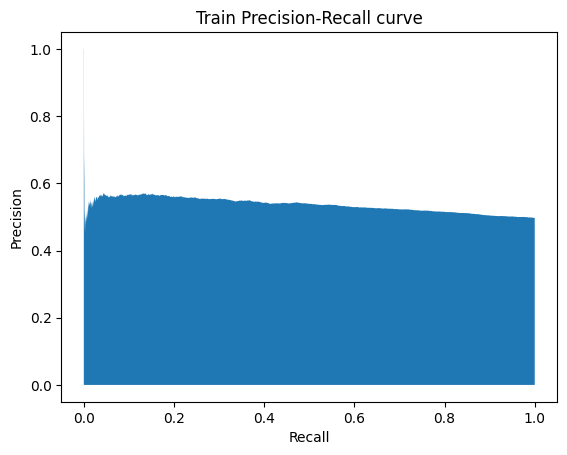

In [24]:
import matplotlib.pyplot as plt
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")